#### Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [6]:
fraud_check_data=pd.read_csv("Fraud_check (1).csv")
fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
fraud_check_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud_check_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
fraud_check_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
# applying one hot encoding to categorical data to int
fraud_check_data = pd.get_dummies(fraud_check_data, columns = ['Undergrad','Marital.Status','Urban'])

In [11]:
fraud_check_data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


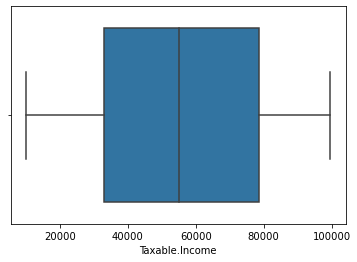

In [12]:
ax = sns.boxplot(fraud_check_data['Taxable.Income']) # no outliers

In [13]:
fraud_check_data['Taxable.Income']=pd.cut(fraud_check_data['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [14]:
fraud_check_data['Taxable.Income'].head(100)

0      good
1      good
2      good
3      good
4      good
      ...  
95     good
96    risky
97     good
98    risky
99     good
Name: Taxable.Income, Length: 100, dtype: category
Categories (2, object): ['risky' < 'good']

In [15]:
X = fraud_check_data.iloc[:,1:10]
y = fraud_check_data.iloc[:,0]

In [16]:
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [17]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [19]:
model = DT(criterion='entropy') 
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
pred_train = model.predict(X_train)
print("train Data:",accuracy_score(y_train,pred_train))
pred_test = model.predict(X_test)
print("test Data:",accuracy_score(y_test,pred_test))

train Data: 1.0
test Data: 0.7166666666666667


In [21]:
print("Train data confusion matrix\n",confusion_matrix(y_train,pred_train))
print("Test data confusion matrix\n",confusion_matrix(y_test,pred_test))

Train data confusion matrix
 [[382   0]
 [  0  98]]
Test data confusion matrix
 [[81 13]
 [21  5]]


In [ ]:
# final=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
# final

In [22]:
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
model_with_bagging =BaggingClassifier(DecisionTreeClassifier(criterion="gini",max_depth = 15))
model_with_bagging

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))

In [23]:
model_with_bagging = model_with_bagging.fit(X_train,y_train) #train decision tree
y_predict_train=model_with_bagging.predict(X_train)
y_predict = model_with_bagging.predict(X_test)
print("Accuracy for train data:",accuracy_score(y_train,y_predict_train)*100)
print("Accuracy for test data: ", accuracy_score(y_test,y_predict)*100 )
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Accuracy for train data: 95.625
Accuracy for test data:  73.33333333333333
[[87  7]
 [25  1]]
              precision    recall  f1-score   support

        good       0.78      0.93      0.84        94
       risky       0.12      0.04      0.06        26

    accuracy                           0.73       120
   macro avg       0.45      0.48      0.45       120
weighted avg       0.64      0.73      0.67       120



In [24]:
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
model_with_adaboost =AdaBoostClassifier(DecisionTreeClassifier(criterion="gini",max_depth = 10))
model_with_adaboost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10))

In [26]:
model_with_adaboost = model_with_adaboost.fit(X_train,y_train) #train decision tree
y_predict_train=model_with_adaboost.predict(X_train)
y_predict = model_with_adaboost.predict(X_test)
print("Accuracy for train data:",accuracy_score(y_train,y_predict_train)*100)
print("Accuracy for test data: ", accuracy_score(y_test,y_predict)*100 )
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Accuracy for train data: 100.0
Accuracy for test data:  70.83333333333334
[[83 11]
 [24  2]]
              precision    recall  f1-score   support

        good       0.78      0.88      0.83        94
       risky       0.15      0.08      0.10        26

    accuracy                           0.71       120
   macro avg       0.46      0.48      0.46       120
weighted avg       0.64      0.71      0.67       120



# Pruning to avoid overfitting

In [27]:
path=model.cost_complexity_pruning_path(X_train,y_train)
alpha=path['ccp_alphas']
alpha

array([0.        , 0.00286967, 0.00300803, 0.003125  , 0.00321908,
       0.00344535, 0.00367205, 0.00376004, 0.00376004, 0.00382623,
       0.00406264, 0.00416667, 0.00420003, 0.00431428, 0.00446189,
       0.0045297 , 0.00463309, 0.00464567, 0.00477261, 0.00505703,
       0.00505703, 0.00516297, 0.0051683 , 0.00517271, 0.00550728,
       0.0056215 , 0.00573935, 0.00579316, 0.00598903, 0.00606709,
       0.00608325, 0.00612029, 0.00617895, 0.00659775, 0.00676065,
       0.00680449, 0.00782825, 0.01192181])

In [28]:
accuracy_train,accuracy_test=[],[]
for i in alpha:
    model=DecisionTreeClassifier(ccp_alpha=i)
    model.fit(X_train,y_train)
    y_predict_train=model.predict(X_train)
    y_predict = model.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_predict_train))
    accuracy_test.append(accuracy_score(y_test,y_predict))
    

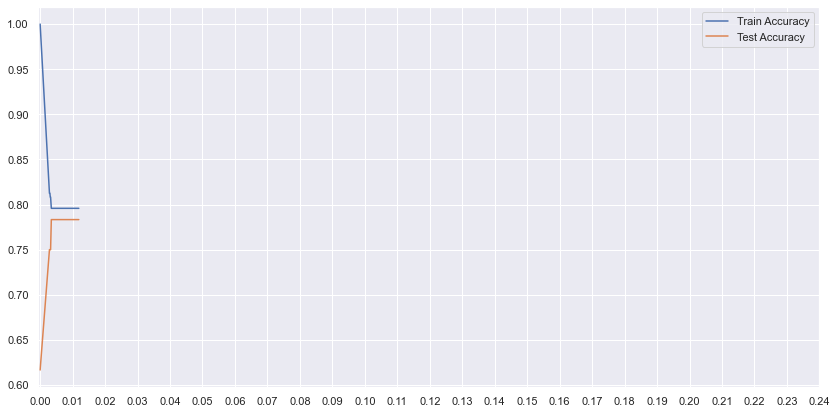

In [29]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alpha,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alpha,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [32]:
model=DecisionTreeClassifier(ccp_alpha=0.01)
model.fit(X_train,y_train)
y_predict_train=model.predict(X_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_train,y_predict_train))
print(accuracy_score(y_test,y_predict))

0.7958333333333333
0.7833333333333333
